In [28]:
import matplotlib.pyplot as plt

import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf

seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)



In [29]:
def plot_value_counts(data, column, figsize=(8, 6)):
    """
    Plot the count of each unique value in a specified column of a DataFrame.

    Parameters:
    - data: DataFrame, the input data
    - column: str, the name of the column to plot
    - figsize: tuple, optional, the size of the figure (width, height)

    Returns:
    None
    """
    # Count the occurrences of each unique value in the specified column
    value_counts = data[column].value_counts()

    # Plot the bar chart
    plt.figure(figsize=figsize)
    value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Count of Each Unique Value in {column} Column')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=0)  # Rotate x-axis labels if needed
    plt.show()




def plot_metrics(history, lr =True):
    """
    Plot training and validation metrics along with learning rate (if available) over epochs.

    Parameters:
    - history: dict, history object returned by model.fit(), containing metrics for training and validation

    Returns:
    None
    """
    # Extract metrics from history
    loss = history['loss']
    accuracy = history['accuracy']
    precision = history['precision']
    recall = history['recall']
    auc = history['auc']

    val_loss = history['val_loss']
    val_accuracy = history['val_accuracy']
    val_precision = history['val_precision']
    val_recall = history['val_recall']
    val_auc = history['val_auc']

    # Check if learning rate information is available
    if 'lr' in history and lr is True:
        lr = history['lr']  # Learning rate
        lr_available = True
    else:
        lr_available = False

    epochs = range(1, len(loss) + 1)

    # Plot training and validation loss with learning rate (if available)
    plt.figure(figsize=(12, 3))
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    if lr_available:
        plt.plot(epochs, lr, 'g--', label='Learning rate')  # Learning rate plot
        # Annotate learning rate changes
        for i in range(1, len(epochs)):
            if lr[i] != lr[i - 1]:
                plt.text(i, lr[i], f'{lr[i]:.6f}', horizontalalignment='center', verticalalignment='bottom')

    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot training and validation accuracy with learning rate (if available)
    plt.figure(figsize=(12, 3))
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    if lr_available:
        plt.plot(epochs, lr, 'g--', label='Learning rate')  # Learning rate plot
        # Annotate learning rate changes
        for i in range(1, len(epochs)):
            if lr[i] != lr[i - 1]:
                plt.text(i, lr[i], f'{lr[i]:.6f}', horizontalalignment='center', verticalalignment='bottom')

    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot training and validation precision with learning rate (if available)
    plt.figure(figsize=(12, 3))
    plt.plot(epochs, precision, 'b', label='Training precision')
    plt.plot(epochs, val_precision, 'r', label='Validation precision')
    if lr_available:
        plt.plot(epochs, lr, 'g--', label='Learning rate')  # Learning rate plot
        # Annotate learning rate changes
        for i in range(1, len(epochs)):
            if lr[i] != lr[i - 1]:
                plt.text(i, lr[i], f'{lr[i]:.6f}', horizontalalignment='center', verticalalignment='bottom')

    plt.title('Training and Validation Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

    # Plot training and validation recall with learning rate (if available)
    plt.figure(figsize=(12, 3))
    plt.plot(epochs, recall, 'b', label='Training recall')
    plt.plot(epochs, val_recall, 'r', label='Validation recall')
    if lr_available:
        plt.plot(epochs, lr, 'g--', label='Learning rate')  # Learning rate plot
        # Annotate learning rate changes
        for i in range(1, len(epochs)):
            if lr[i] != lr[i - 1]:
                plt.text(i, lr[i], f'{lr[i]:.6f}', horizontalalignment='center', verticalalignment='bottom')

    plt.title('Training and Validation Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()
    plt.show()

    # Plot training and validation AUC with learning rate (if available)
    plt.figure(figsize=(12, 3))
    plt.plot(epochs, auc, 'b', label='Training AUC')
    plt.plot(epochs, val_auc, 'r', label='Validation AUC')
    if lr_available:
        plt.plot(epochs, lr, 'g--', label='Learning rate')  # Learning rate plot
        # Annotate learning rate changes
        for i in range(1, len(epochs)):
            if lr[i] != lr[i - 1]:
                plt.text(i, lr[i], f'{lr[i]:.6f}', horizontalalignment='center', verticalalignment='bottom')

    plt.title('Training and Validation AUC')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.legend()
    plt.show()


def extract_layer_parameters(model):
    """
    Extracts parameters of each layer in the given Keras model.

    Args:
    - model: A Keras model object.

    Prints:
    - Parameters of each layer in the model.
    """

    print("#"*15)
    print("Architecture:")
    print("#"*15)
    for layer in model.layers:
        layer_name = layer.__class__.__name__
        # print(f"Layer Type: {layer_name}")

        if isinstance(layer, tf.keras.layers.Bidirectional):
            # For Bidirectional LSTM layer
            units = layer.layer.units
            print(f"{layer_name}: {units}")

        elif isinstance(layer, tf.keras.layers.Dropout):
            # For Dropout layer
            rate = layer.rate
            print(f"{layer_name}: {rate}")

        elif isinstance(layer, tf.keras.layers.Dense):
            # For Dense layer
            units = layer.units
            print(f"{layer_name}: {units}")

        elif isinstance(layer, tf.keras.layers.LeakyReLU):
            # For LeakyReLU layer
            rate = layer.alpha
            print(f"{layer_name}: {rate}")

        # You can add conditions for other layer types as well, such as optimizers
# Example usage:
# Assuming 'model' is your Keras model
# extract_layer_parameters(model)



df length: 22326


,NMSG,CPU_MAX,CPU_AVG,ANOMALY
date,,,,
2021-07-12 21:00:00,377913.0,5.04,3.39,0
2021-07-12 22:00:00,313887.0,6.14,3.80,0
2021-07-12 23:00:00,198643.0,3.70,2.24,0
2021-07-13 00:00:00,106526.0,2.65,1.68,0
2021-07-13 01:00:00,66607.0,2.12,1.76,0


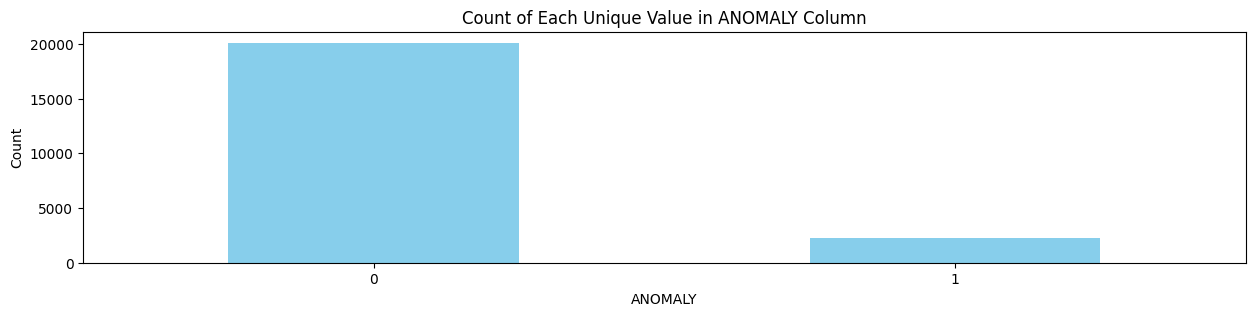

In [30]:
# Assuming "my_data.csv" is the name of your CSV file
DATA_PATH ="../artifacts/DATE_NMSG_CPUMAX_CPUAVG_ANOMALY/df_input_1.csv"
dataset = pd.read_csv(DATA_PATH)
print("df length:",len(dataset))
# Convert 'date' column to datetime
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['ANOMALY'] = dataset['ANOMALY'].astype(int)
# Set 'date' column as index
dataset.set_index('date', inplace=True)
display(dataset.head())


# For code 2
plot_value_counts(dataset, 'ANOMALY', figsize=(15, 3))

In [31]:
# # Assuming 'dataset' is your DataFrame
# values = dataset.values
# groups = [0, 1, 2, 3]
# i = 1

# # Define figure size
# fig = plt.figure(figsize=(20, 8))

# for group in groups:
#     plt.subplot(len(groups), 1, i)
#     plt.plot(values[:, group])
#     plt.title(dataset.columns[group], y=0.5, loc='right')
#     i += 1

# plt.tight_layout()  # Adjust layout to prevent overlap
# plt.show()


In [32]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
	data: Sequence of observations as a list or NumPy array.
	n_in: Number of lag observations as input (X).
	n_out: Number of observations as output (y).
	dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
	Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
values = dataset.values

# ensure all data is float
values = values.astype('float32')

# # normalize features
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(values, 24, 1)
reframed.reset_index(drop=True, inplace=True)

columns_to_drop = ['var1(t)', 'var2(t)', 'var3(t)']
reframed = reframed.drop(columns=columns_to_drop)

reframed.head()

,var1(t-24),var2(t-24),var3(t-24),var4(t-24),var1(t-23),var2(t-23),var3(t-23),var4(t-23),var1(t-22),var2(t-22),...,var3(t-2),var4(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t),var2(t),var3(t),var4(t)
0,377913.0,5.04,3.39,0.0,313887.0,6.14,3.80,0.0,198643.0,3.70,...,8.17,0.0,605738.0,6.29,4.74,0.0,404439.0,4.22,3.62,0.0
1,313887.0,6.14,3.80,0.0,198643.0,3.70,2.24,0.0,106526.0,2.65,...,4.74,0.0,404439.0,4.22,3.62,0.0,350391.0,6.82,4.11,0.0
2,198643.0,3.70,2.24,0.0,106526.0,2.65,1.68,0.0,66607.0,2.12,...,3.62,0.0,350391.0,6.82,4.11,0.0,225120.0,4.45,2.57,0.0
3,106526.0,2.65,1.68,0.0,66607.0,2.12,1.76,0.0,78652.0,2.10,...,4.11,0.0,225120.0,4.45,2.57,0.0,121259.0,2.35,1.73,0.0
4,66607.0,2.12,1.76,0.0,78652.0,2.10,1.35,0.0,55483.0,2.33,...,2.57,0.0,121259.0,2.35,1.73,0.0,68738.0,2.27,1.90,0.0


In [33]:
len(reframed)

22302

,var1(t-24),var2(t-24),var3(t-24),var4(t-24),var1(t-23),var2(t-23),var3(t-23),var4(t-23),var1(t-22),var2(t-22),...,var4(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var4(t)
0,119189.0,2.13,1.45,1.0,243941.0,3.14,2.23,0.0,520228.0,5.48,...,0.0,60847.0,1.37,1.04,0.0,67052.0,2.24,1.27,0.0,0.0
1,520228.0,5.48,3.97,0.0,903017.0,7.88,6.27,0.0,1183556.0,9.63,...,0.0,118920.0,100.00,3.06,0.0,260237.0,3.20,2.26,0.0,0.0
2,1183556.0,9.63,7.98,0.0,1238797.0,10.01,8.69,0.0,1152416.0,10.11,...,0.0,550315.0,5.52,4.06,0.0,912866.0,7.90,6.32,0.0,0.0
3,889638.0,8.34,6.62,0.0,735701.0,6.58,5.69,0.0,704076.0,6.37,...,0.0,1263018.0,10.44,9.00,0.0,1156478.0,10.18,8.52,0.0,0.0
4,404439.0,4.22,3.62,0.0,350391.0,6.82,4.11,0.0,225120.0,4.45,...,0.0,1135052.0,10.10,8.33,0.0,631719.0,7.01,5.17,0.0,0.0


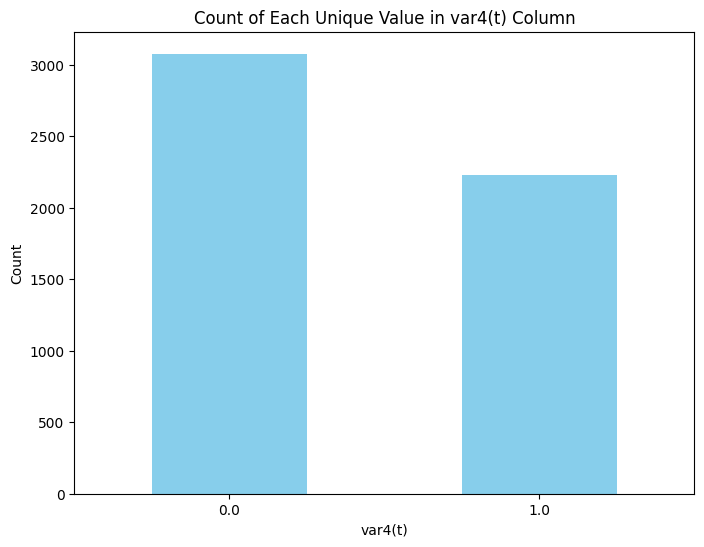

In [6]:
# Assuming 'reframed' is your DataFrame
# First, identify the rows where var4(t) is equal to 0.0
rows_to_drop = reframed.index[reframed['var4(t)'] == 0]

# Randomly select 10,000 rows to drop
rows_to_drop = np.random.choice(rows_to_drop, size=17000, replace=False)

# Drop the selected rows
reframed.drop(rows_to_drop, inplace=True)

# Optionally, reset index if needed
reframed.reset_index(drop=True, inplace=True)
display(reframed.head())

# For code 1
plot_value_counts(reframed, 'var4(t)')

In [7]:
values = reframed.values
values

array([[1.191890e+05, 2.130000e+00, 1.450000e+00, ..., 1.270000e+00,
        0.000000e+00, 0.000000e+00],
       [5.202280e+05, 5.480000e+00, 3.970000e+00, ..., 2.260000e+00,
        0.000000e+00, 0.000000e+00],
       [1.183556e+06, 9.630000e+00, 7.980000e+00, ..., 6.320000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [7.055840e+05, 9.580000e+00, 7.740000e+00, ..., 8.140000e+00,
        0.000000e+00, 0.000000e+00],
       [8.269440e+05, 1.041000e+01, 9.270000e+00, ..., 1.330000e+01,
        0.000000e+00, 0.000000e+00],
       [9.410000e+05, 1.166000e+01, 1.044000e+01, ..., 1.128000e+01,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [8]:
# ...
# # split into train and test sets
# values = reframed.values
# n_train_hours = 5000 #365 * 24
# train = values[:n_train_hours, :]
# validation = values[n_train_hours:7000, :]
# test = values[7000:, :]

# # split into input and outputs
# train_X, train_y = train[:, :-1], train[:, -1]
# validation_X, validation_y = validation[:, :-1], validation[:, -1]
# test_X, test_y = test[:, :-1], test[:, -1]

# train_y = train_y.astype(int)
# validation_y = validation_y.astype(int)
# test_y = test_y.astype(int)

# # reshape input to be 3D [samples, timesteps, features]
# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# validation_X = validation_X.reshape((validation_X.shape[0], 1, validation_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# print(train_X.shape, train_y.shape, validation_X.shape, validation_y.shape, test_X.shape, test_y.shape)

In [9]:
# Splitting data into train and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(values[:, :-1], values[:, -1], test_size=0.05, stratify=values[:, -1],random_state=seed_value)

# Splitting train_val set into train and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train_val, y_train_val, test_size=0.4, stratify=y_train_val,random_state=seed_value)

# Reshaping input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_validation = X_validation.reshape((X_validation.shape[0], 1, X_validation.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)


(3021, 1, 96) (3021,) (2015, 1, 96) (2015,) (266, 1, 96) (266,)


In [10]:
# Assuming your array is named 'arr'
unique_values, counts = np.unique(y_train, return_counts=True)
# Combine unique values and their corresponding counts
train_value_counts = dict(zip(unique_values, counts))

# Assuming your array is named 'arr'
unique_values, counts = np.unique(y_validation, return_counts=True)
# Combine unique values and their corresponding counts
validation_value_counts = dict(zip(unique_values, counts))

# Assuming your array is named 'arr'
unique_values, counts = np.unique(y_test, return_counts=True)
# Combine unique values and their corresponding counts
test_value_counts = dict(zip(unique_values, counts))


print("train_value_counts:",train_value_counts)
print("validation_value_counts:",validation_value_counts)
print("test_value_counts:",test_value_counts)

train_value_counts: {0.0: 1753, 1.0: 1268}
validation_value_counts: {0.0: 1169, 1.0: 846}
test_value_counts: {0.0: 154, 1.0: 112}


In [11]:
# np.unique(y_train)
# y_train_int = y_train.astype(np.int)
# y_train_int

In [12]:
from sklearn.utils import compute_class_weight
import numpy as np
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )

class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0.0: 0.8616657159155733, 1.0: 1.1912460567823344}

In [13]:
model = tf.keras.Sequential()

n_layers = 128
dropout = 0.2
                         
# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(n_layers, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(tf.keras.layers.Dropout(0.5)) 

# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(n_layers*2, return_sequences=True)))
# model.add(tf.keras.layers.Dropout(0.7)) 

# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(n_layers, return_sequences=False)))
# model.add(tf.keras.layers.Dropout(0.7)) 
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))



###############################
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(int(n_layers), return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(tf.keras.layers.Dropout(dropout*2)) 

# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(int(n_layers), return_sequences=True)))
# model.add(tf.keras.layers.Dropout(dropout)) 

# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(int(n_layers/2), return_sequences=False)))
model.add(tf.keras.layers.Dropout(dropout))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
###############################

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 256)               230400    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 230657 (901.00 KB)
Trainable params: 230657 (901.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# import tensorflow as tf

# seed_value = 42

# tf.random.set_seed(seed_value)
# np.random.seed(seed_value)

# model = tf.keras.Sequential()

# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True), input_shape=(train_X.shape[1], train_X.shape[2])))
# # model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
# model.add(tf.keras.layers.ReLU())
# model.add(tf.keras.layers.Dropout(0.3))

# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
# # model.add(tf.keras.layers.ReLU())
# model.add(tf.keras.layers.LeakyReLU(alpha=0.9))
# model.add(tf.keras.layers.Dropout(0.5))

# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.9))
# # model.add(tf.keras.layers.ReLU())
# model.add(tf.keras.layers.Dropout(0.5))

# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.9))
# # model.add(tf.keras.layers.ReLU())
# model.add(tf.keras.layers.Dropout(0.5))

# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.9))
# # model.add(tf.keras.layers.ReLU())
# model.add(tf.keras.layers.Dropout(0.5))

# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.9))
# # model.add(tf.keras.layers.ReLU())
# model.add(tf.keras.layers.Dropout(0.5))

# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=False)))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.9))
# # model.add(tf.keras.layers.ReLU())
# model.add(tf.keras.layers.Dropout(0.5))

# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# model.summary()

In [15]:
learning_rate=0.001
epochs=500
batch_size=256

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.9,
    patience=50,
    verbose=1,
    mode='min',
    min_lr=5e-4
)

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.optimizers.Adam(learning_rate=learning_rate),  # Use learning_rate instead of lr
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
)

history = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data=(X_validation, y_validation), 
                    verbose=2, 
                    shuffle=False,
                    class_weight=class_weights,
                    callbacks=[lr_scheduler]  # Include both callbacks
                    )

# # plot history
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='validation')
# pyplot.legend()
# pyplot.show()

Epoch 1/500
12/12 - 4s - loss: 0.7439 - accuracy: 0.4439 - precision: 0.4031 - recall: 0.6759 - auc: 0.4587 - val_loss: 0.7406 - val_accuracy: 0.4432 - val_precision: 0.4046 - val_recall: 0.6915 - val_auc: 0.4847 - lr: 0.0010 - 4s/epoch - 337ms/step
Epoch 2/500
12/12 - 0s - loss: 0.7147 - accuracy: 0.4816 - precision: 0.4232 - recall: 0.6475 - auc: 0.5123 - val_loss: 0.7047 - val_accuracy: 0.5136 - val_precision: 0.4442 - val_recall: 0.6300 - val_auc: 0.5337 - lr: 0.0010 - 191ms/epoch - 16ms/step
Epoch 3/500
12/12 - 0s - loss: 0.6904 - accuracy: 0.5405 - precision: 0.4628 - recall: 0.5891 - auc: 0.5656 - val_loss: 0.6806 - val_accuracy: 0.5682 - val_precision: 0.4878 - val_recall: 0.5662 - val_auc: 0.5999 - lr: 0.0010 - 190ms/epoch - 16ms/step
Epoch 4/500
12/12 - 0s - loss: 0.6766 - accuracy: 0.5727 - precision: 0.4923 - recall: 0.5797 - auc: 0.6034 - val_loss: 0.6629 - val_accuracy: 0.5876 - val_precision: 0.5077 - val_recall: 0.5816 - val_auc: 0.6464 - lr: 0.0010 - 190ms/epoch - 16ms

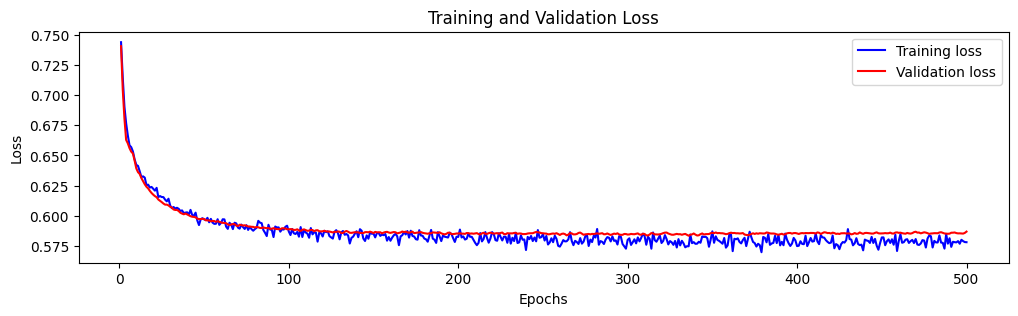

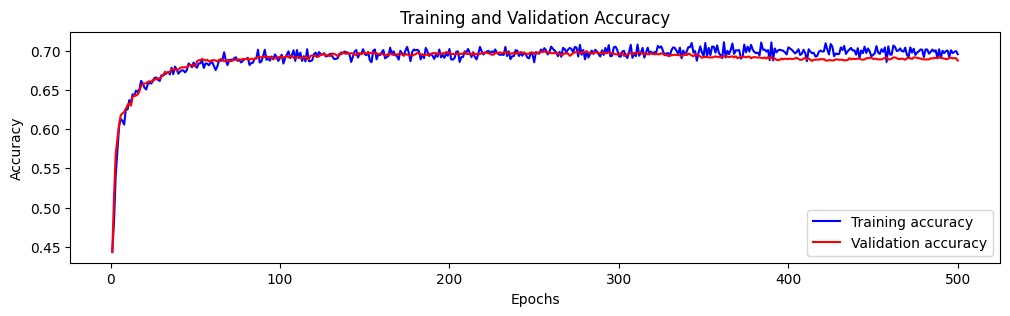

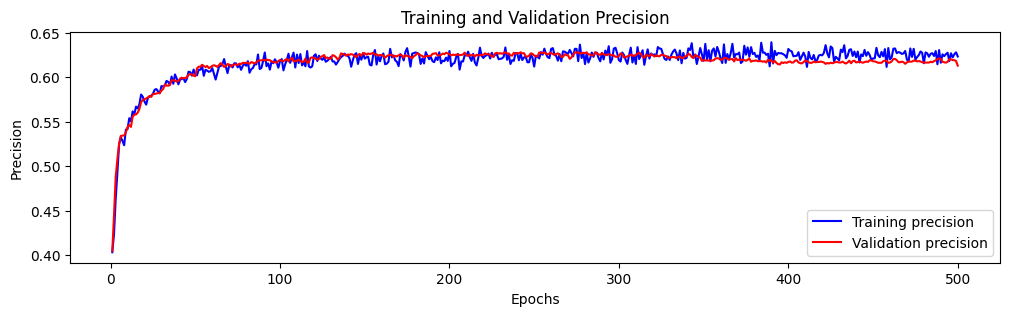

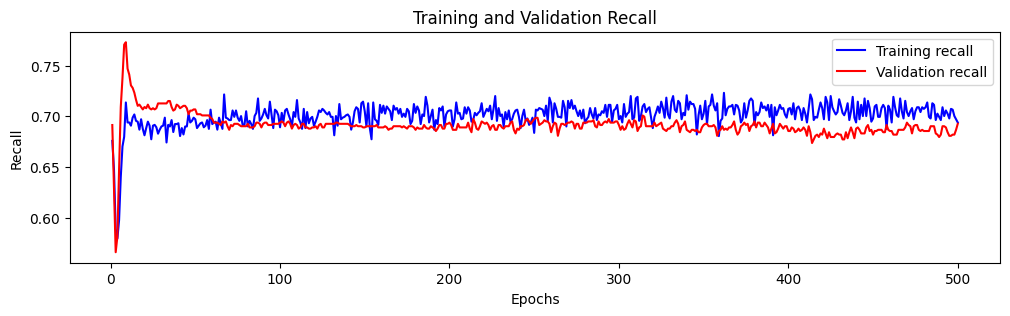

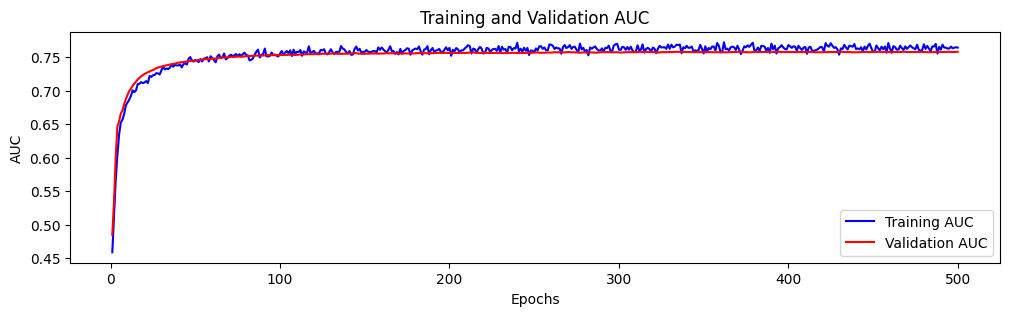

In [16]:
plot_metrics(history.history, lr=False)

In [17]:
# make a prediction
yhat = model.predict(X_test)

# Convert to DataFrame
df_pred = pd.DataFrame(yhat, columns=['ANOMALY_pred'])
# Adjust ANOMALY_pred column values
df_pred['ANOMALY_pred'] = df_pred['ANOMALY_pred'].apply(lambda x: 1.0 if x > 0.5 else 0.0)
df_pred['ANOMALY'] = y_test
# df_pred[df_pred["ANOMALY"] == 1.0]


9/9 [==============================] - 1s 3ms/step


###############
Architecture:
###############
Bidirectional: 128
Dropout: 0.2
Dense: 1

###############
Params:
###############
learning_rate: 0.001
epochs: 500
batch_size: 256

###############
Number of true Anomalies: 112
Number of predicted Anomalies: 122
###############

Confusion Matrix:
True Negative (TN): 114
False Positive (FP): 40
False Negative (FN): 30
True Positive (TP): 82


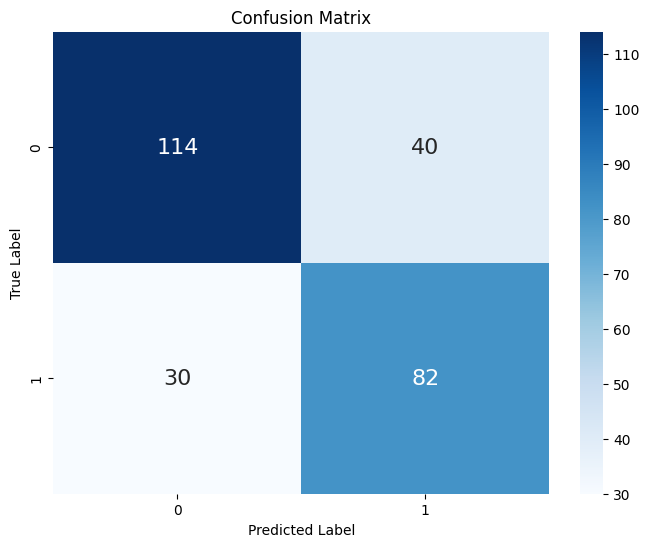

In [18]:
import seaborn as sns

extract_layer_parameters(model)

print()
print("#"*15)
print("Params:")
print("#"*15)
print("learning_rate:",learning_rate)
print("epochs:",epochs)
print("batch_size:",batch_size)

# Generate confusion matrix
conf_matrix = confusion_matrix(df_pred['ANOMALY'], df_pred['ANOMALY_pred'])
print()
print("#"*15)
print("Number of true Anomalies:",len(df_pred[df_pred["ANOMALY"] == 1.0]))
print("Number of predicted Anomalies:",len(df_pred[df_pred["ANOMALY_pred"] == 1.0]))
print("#"*15)

print()
# Generate confusion matrix
conf_matrix = confusion_matrix(df_pred['ANOMALY'], df_pred['ANOMALY_pred'])
print("Confusion Matrix:")
# Extract values from confusion matrix
true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
true_positive = conf_matrix[1, 1]
# Print analysis
print("True Negative (TN):", true_negative)
print("False Positive (FP):", false_positive)
print("False Negative (FN):", false_negative)
print("True Positive (TP):", true_positive)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [27]:
# import os

# # Get a list of existing model files
# model_files = os.listdir('LSTM_Classification_models/')

# # Extract version numbers from existing model files
# existing_versions = [int(filename.split('_v')[-1].split('.h5')[0]) for filename in model_files if filename.startswith('classification_model_v')]

# # Determine the new version number
# if existing_versions:
#     new_version = max(existing_versions) + 1
# else:
#     new_version = 1

# # Save the model with the new version number
# model.save(f'LSTM_Classification_models/classification_model_v{new_version}.h5')

# print(f"Model saved as classification_model_v{new_version}.h5")


Model saved as classification_model_v6.h5


/home/elshan/Projects/Nexi/performance_prediction/env_performance/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
# !pip install keras-tuner

In [21]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Bidirectional, Dropout, LeakyReLU, Dense
# from tensorflow.keras.optimizers import Adam
# from keras_tuner import RandomSearch
# from sklearn.model_selection import train_test_split

# def build_model(hp):
#     model = Sequential()
#     n_layers = hp.Int('n_layers', min_value=64, max_value=256, step=32)
#     model.add(Bidirectional(LSTM(n_layers, return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])))
#     model.add(Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
#     model.add(LeakyReLU(hp.Float('leaky_relu_alpha', min_value=0.1, max_value=0.9, step=0.1)))
#     model.add(Dense(1, activation='sigmoid'))
    
#     lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
#     model.compile(
#         loss='binary_crossentropy',
#         optimizer=Adam(learning_rate=lr),
#         metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
#     )
    
#     return model


In [22]:
# # Split the data into training and validation sets
# # X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# # Instantiate the tuner
# tuner = RandomSearch(
#     build_model,
#     objective='val_loss',
#     max_trials=10,
#     executions_per_trial=1,
#     directory='my_dir',
#     project_name='my_project'
# )

# # Perform the hyperparameter search
# tuner.search(X_train, y_train,
#              epochs=200,
#              validation_data=(X_validation, y_validation),
#              class_weight=class_weights
#             #  callbacks=[lr_scheduler]
#              )

# # Get the best hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f"Best Hyperparameters: {best_hps}")


In [23]:
# # Get the best hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# # Access individual hyperparameters
# best_n_layers = best_hps.get('n_layers')
# best_dropout = best_hps.get('dropout')
# best_leaky_relu_alpha = best_hps.get('leaky_relu_alpha')
# best_learning_rate = best_hps.get('learning_rate')

# print("Best Hyperparameters:")
# print(f"Number of Layers: {best_n_layers}")
# print(f"Dropout Rate: {best_dropout}")
# print(f"Leaky ReLU Alpha: {best_leaky_relu_alpha}")
# print(f"Learning Rate: {best_learning_rate}")
